<a href="https://colab.research.google.com/github/aminbuet/Deep_Learning_Projects/blob/master/Classification_book.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

#check status of system
print("Version: " , tf.__version__)
print("Eager Mode: ", tf.executing_eagerly())
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "Not Available")

Version:  2.2.0-rc2
Eager Mode:  True
GPU is Not Available


In [0]:
# load data and split train & test set
fashion_mnist = tf.keras.datasets.fashion_mnist
#X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
type(fashion_mnist)

module

In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
len(train_labels)

60000

In [0]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [0]:
len(test_labels)

10000

In [0]:
# train labels and images
print('Training Lebel:')
print(train_labels[0])
print('Training Image:')
print(train_images[0])

Training Lebel:
9
Training Image:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0 

In [0]:
np.max(train_images)

255

**Data Pre-processing**

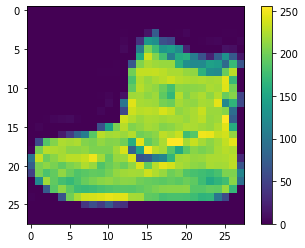

In [0]:
# check the first image
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

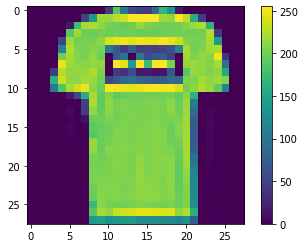

In [0]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

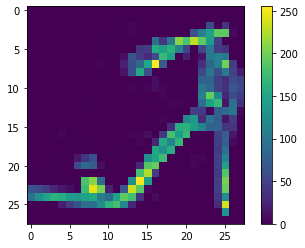

In [0]:
plt.figure()
plt.imshow(train_images[8])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
# Normalize data as the range of is very wide
train_images = train_images / 255.0
test_images = test_images / 255.0

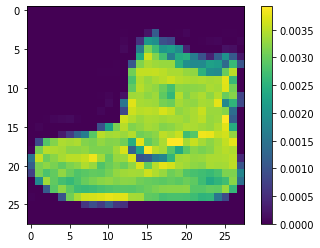

In [0]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

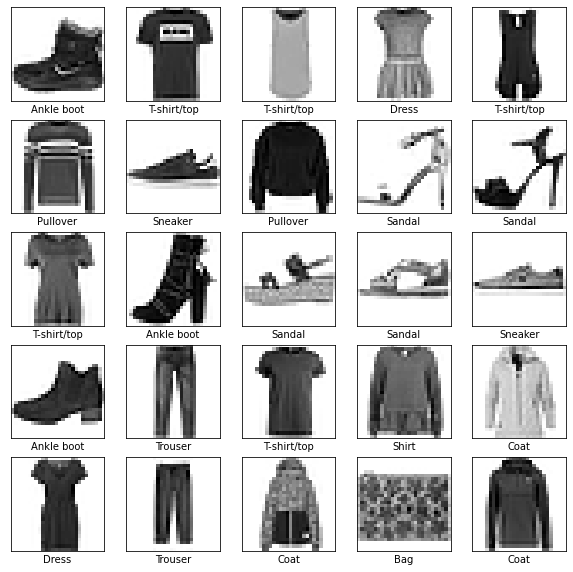

In [0]:
# check all data is in same format
# As declare class before, we can see the name below the images
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

plt.show()

BUILD MODEL

In [0]:
# Define layers sequence
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10, activation='softmax')
])

In [0]:
# Compile model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
# Train model
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0746 - accuracy: 0.6702
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6367 - accuracy: 0.7707
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5626 - accuracy: 0.7983
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5205 - accuracy: 0.8158
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4929 - accuracy: 0.8255
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4727 - accuracy: 0.8328
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4577 - accuracy: 0.8385
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4457 - accuracy: 0.8424
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4356 - accuracy: 0.8458
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.427

In [0]:
# evaluate model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('\nTest Accuracy : ', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 88.4232 - accuracy: 0.7080

Test Accuracy :  0.7080000042915344


In [0]:
# Similar in scikit learn
from sklearn.metrics import accuracy_score
pred_labels = model.predict_classes(test_images)
print('\nAccuracy:', accuracy_score(test_labels, pred_labels))


Accuracy: 0.708


In [0]:
#predictions
predictions = model.predict(test_images)
predictions[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [0]:
# check most confifdence of probabity distribution
np.argmax(predictions[0])

9

In [0]:
# check
test_labels[0]

9

In [0]:
# for visualize 10 samples in graph
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)


In [0]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

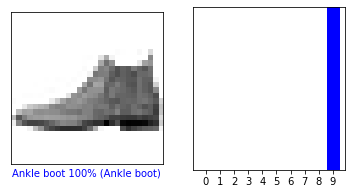

In [0]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

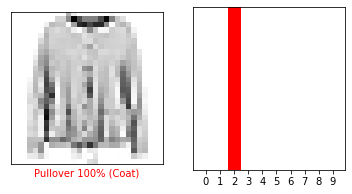

In [0]:
i = 25
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

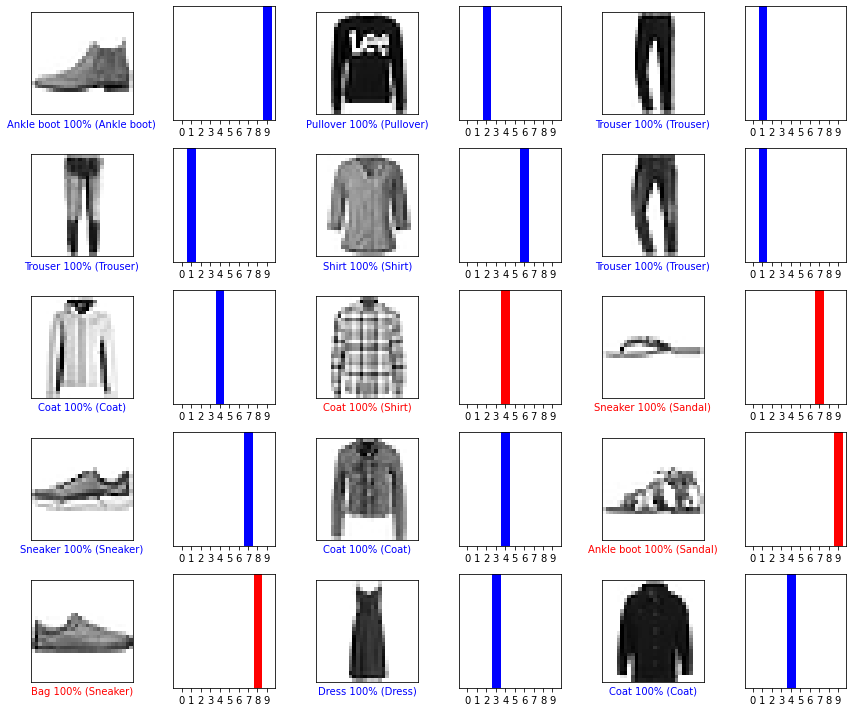

In [0]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Batch Prediction

In [0]:
# Predict an image with this trined model
img = test_images[0]
img.shape

(28, 28)

In [0]:
# for batch
img = np.expand_dims(img,0)
img.shape

(1, 28, 28)

In [0]:
predict_single = model.predict(img)
predict_single

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

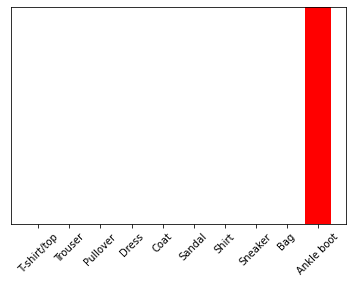

In [0]:
plot_value_array(1, predict_single[0], test_labels)
_=plt.xticks(range(10), class_names, rotation=45)

In [0]:
# check
np.argmax(predict_single[0])

9

understanding callback

In [0]:
# define callback loop to reached certain accuracy
class mycallback(tf.keras.callbacks.Callback):
  def on_epoc_end(self, epoch, logs={}):
    if (logs.get('accuracy')>0.9):
      print("\nReached 90% accuracy, so cvancelling training!!")
      self.model.stop_training = True

#all same code
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Only new code
callbacks = mycallback()

# layers
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

#compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# fit
model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4778 - accuracy: 0.8299
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3592 - accuracy: 0.8697
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3215 - accuracy: 0.8810
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2983 - accuracy: 0.8898
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2821 - accuracy: 0.8953
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2647 - accuracy: 0.9014
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2519 - accuracy: 0.9054
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2386 - accuracy: 0.9114
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2298 - accuracy: 0.9132
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.220

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


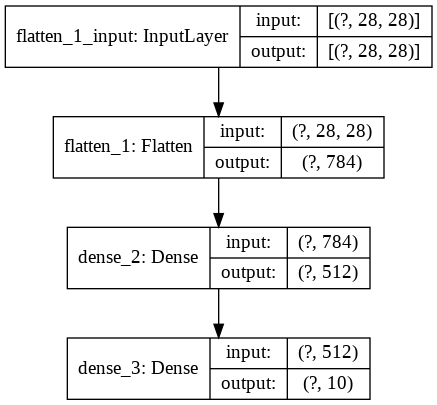

In [0]:
# we can see, too many params in hidden layer = 784*512 = 2* 407050

# create a plot
keras.utils.plot_model(model, 'mnist_model.png', show_shapes=True)

In [0]:
# check layers name
model.layers

In [0]:
hidden1=model.layers[1]
hidden1.name

'dense_2'

In [0]:
hidden2=model.layers[2]
hidden2.name

'dense_3'

In [0]:
model.get_layer(hidden1.name) is hidden1

True

In [0]:
weights, biases = hidden1.get_weights()

In [0]:
weights

array([[-0.01989093, -0.10992348, -0.02897615, ..., -0.01308713,
        -0.01397539, -0.06125752],
       [-0.04398105, -0.280302  , -0.1124949 , ..., -0.1261154 ,
        -0.06201326, -0.16855185],
       [ 0.10252843, -0.0477287 , -0.06917816, ..., -0.14395463,
        -0.08097561, -0.25802952],
       ...,
       [-0.03273318, -0.29386163,  0.08264645, ..., -0.25891718,
         0.07762202,  0.00600727],
       [-0.05374445, -0.38115522, -0.165717  , ..., -0.44225362,
        -0.19422755,  0.04205965],
       [ 0.03543673, -0.25336775, -0.11503821, ..., -0.4032925 ,
         0.10741395,  0.08043606]], dtype=float32)

In [0]:
weights.shape

(784, 512)

In [0]:
biases

array([-0.08095386, -0.09189528,  0.37294513,  0.35259804,  0.50818807,
        0.16701162, -0.02231851,  0.5449322 ,  0.14698975, -0.01300291,
        0.27697816,  0.22763643,  0.18449497,  0.33344895, -0.12536174,
       -0.03913485,  0.15506628,  0.3855696 , -0.1286993 , -0.02214603,
        0.15809967,  0.00535493,  0.05176621,  0.5147527 , -0.03980166,
        0.05212184, -0.06403252,  0.36373013, -0.01318684, -0.0257621 ,
        0.5239195 ,  0.3100713 , -0.05013927,  0.14109202,  0.423194  ,
        0.45509017,  0.02696111, -0.02272824, -0.06438404,  0.21752667,
       -0.0017559 ,  0.4569196 , -0.10819723,  0.11345234, -0.00996424,
       -0.00879782,  0.09962413,  0.34429103, -0.25988322,  0.16566391,
        0.18614422,  0.25458512,  0.4748047 , -0.09309896,  0.38640285,
       -0.3351178 ,  0.20603904, -0.0387472 , -0.3382436 ,  0.09412623,
        0.02545785,  0.22832035,  0.08230571, -0.0105234 ,  0.2471346 ,
        0.33686608,  0.23188432,  0.45275298, -0.04795795,  0.08

In [0]:
biases.shape

(512,)

**Make tensorflow light version**
to make an appp for mobile

In [0]:
export_dir = 'saved_model/1'
tf.saved_model.save(model, export_dir)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: saved_model/1/assets


In [0]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [0]:
tflite_model_file = 'model.tflite'

with open(tflite_model_file, "wb") as f:
  f.write(tflite_model)

In [0]:
with open('labels.txt', 'w') as f:
  f.write('\n'.join(class_names))

In [0]:
# download
try:
  from google.colab import files

  files.download(tflite_model_file)
  files.download('labels.txt')
except:
  pass

Tensorflow Dataset API

In [0]:
# আমরা আমরা এভাবেও চেষ্টা করতে পারি, টেন্সর-ফ্লো এর ডেটাসেট এপিআই দিয়ে
# tfds হচ্ছে টেন্সর ফ্লোতে প্র্যাকটিস করার জন্য তৈরি করা ডেটাসেট, সাইকিট লার্নে যেভাবে দেখেছিলাম

import tensorflow_datasets as tfds
train, test = tfds.load("fashion_mnist", as_supervised=True)

In [0]:
mnist_builder = tfds.builder("fashion_mnist")
mnist_builder.download_and_prepare()
mnist_data = mnist_builder.as_dataset(split = tfds.Split.TRAIN)
info = mnist_builder.info

# নামপাই অ্যারে দিয়ে
np_mnist_data = tfds.as_numpy(mnist_data)

print(mnist_data)

print(np_mnist_data)

print(info)

<DatasetV1Adapter shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>
<generator object _eager_dataset_iterator at 0x7fe9482637d8>
tfds.core.DatasetInfo(
    name='fashion_mnist',
    version=3.0.0,
    description='Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.',
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han Xiao and
                   Kashif Rasul and
                   Roland Vollgraf

In [0]:
# ফিচার ডিকশনারি দেখার জন্য
for features in mnist_data.take(1):
    image, label = features["image"], features["label"]

In [0]:
# অথবা numpy দিয়ে
for features in tfds.as_numpy(mnist_data):
    image, label = features["image"], features["label"]

In [0]:
plt.imshow(image[:, :, 0].astype(np.float32), 
           cmap = plt.get_cmap("gray"))
print("Label: %d" % label)